In [ ]:
from enum import IntEnum

import GCode
import GRBL
import numpy as np

from utils import picture

# Drawing Tests

## Object
- Play around with drawing things.

# Code:

In [18]:
cnc = GRBL.GRBL(port="/dev/cnc_3018")print("Laser Mode: {}".format(cnc.laser_mode))class Tool(IntEnum):    SPINDLE = 0    LASER = 1class LaserPower(IntEnum):    CONSTANT = 0    DYNAMIC = 1LaserPower.CONSTANTdef init(power=LaserPower(0), feed=200, laser=1):    program = GCode.GCode()    program.G20()  # Metric Units    program.G91()  # Absolute positioning.    program.G1(F=feed)  #    if power == LaserPower.CONSTANT:        program.M3(S=laser)  # Laser settings    else:        program.M4(S=laser)  # Laser settings    return programdef end():    program = GCode.GCode()    program.M5()  # Laser settings.    return programdef square(size=0.25):    program = GCode.GCode()    program.G1(X=size)    program.G1(Y=-size)    program.G1(X=-size)    program.G1(Y=size)    return program

Laser Mode: 1.0


## Test Setup

Power Supply:
- CicuitSpecialists CSI3010SW @ 12V
- PostIt Note Grid notes. .25" grid.

Position the paper & other things.

In [44]:
def laser_on(pwm):
    if int(pwm) != np.uint8(pwm):
        raise (Exception("UINT8! {}".format(pwm)))
    # Set minimal power setting to focus and position laser
    cnc.cmd("M3 S{:03d}".format(np.uint8(pwm)))
    cnc.cmd("G1 F10")  # Laser On


def laser_off():
    cnc.cmd("M5")  # Laser off


In [51]:
cnc.cmd("$X")


['ok', 'ok']

In [52]:
laser_on(1)  # Position the axis by hand


In [53]:
laser_off()


In [54]:
tests_x = 10
tests_y = 7


In [55]:
cnc.run(init(laser=0.1) + square(0.25))


0.8327279090881348

In [56]:
def jogx(x=10):
    program = GCode.GCode()
    program.G0(X=x)
    cnc.run(program)


def jogy(y=10):
    program = GCode.GCode()
    program.G0(Y=y)
    cnc.run(program)


def jogz(z=10):
    program = GCode.GCode()
    program.G0(Z=z)
    cnc.run(program)


In [ ]:
square_size = 0.25


# Test Setup

In [57]:
cnc.cmd("$G")


['ok', '[GC:G1 G54 G17 G20 G91 G94 M3 M9 T0 F5080 S0]', 'ok']

In [58]:
cnc.cmd("$#")


['ok',
 '[G54:0.000,0.000,0.000]',
 '[G55:0.000,0.000,0.000]',
 '[G56:0.000,0.000,0.000]',
 '[G57:0.000,0.000,0.000]',
 '[G58:0.000,0.000,0.000]',
 '[G59:0.000,0.000,0.000]',
 '[G28:0.000,0.000,0.000]',
 '[G30:0.000,0.000,0.000]',
 '[G92:0.000,0.000,0.000]',
 '[TLO:0.000]',
 '[PRB:0.000,0.000,0.000:0]',
 'ok']

In [59]:
cnc.cmd("$$")


['ok',
 '$0=10',
 '$1=25',
 '$2=0',
 '$3=5',
 '$4=0',
 '$5=0',
 '$6=0',
 '$10=3',
 '$11=0.010',
 '$12=0.002',
 '$13=0',
 '$20=0',
 '$21=1',
 '$22=0',
 '$23=0',
 '$24=25.000',
 '$25=500.000',
 '$26=250',
 '$27=1.000',
 '$30=1000',
 '$31=0',
 '$32=1',
 '$100=800.000',
 '$101=800.000',
 '$102=800.000',
 '$110=800.000',
 '$111=800.000',
 '$112=500.000',
 '$120=10.000',
 '$121=10.000',
 '$122=10.000',
 '$130=200.000',
 '$131=200.000',
 '$132=200.000',
 'ok']

In [60]:
cnc.cmd("$I")


['ok', '[VER:1.1f.20170801:]', '[OPT:V,15,128]', 'ok']

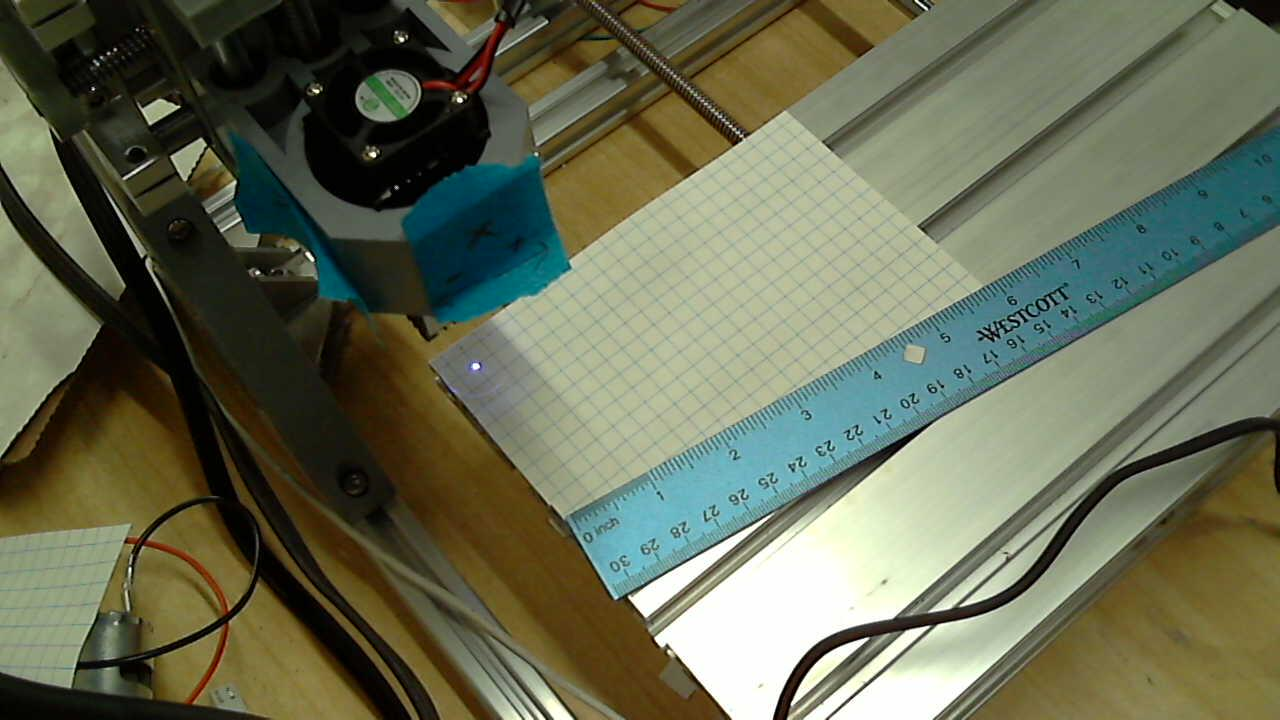

In [61]:
picture()


In [63]:
square_size = 0.25


In [64]:
for feed in np.linspace(50, 1, tests_y):
    for pwm in np.linspace(0, 100, tests_x):
        i = init(laser=np.uint8(pwm), feed=np.round(feed))
        s = square(square_size)
        cnc.run(i + s)
        jogx(square_size * 2)
    jogx(-1 * 2 * tests_x * square_size)
    jogy(-square_size * 2)


.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


In [65]:
cnc.cmd("!")


['ok', 'ok']

In [66]:
cnc.reset()
